<h1> McDonald's API Data Visualization <h1>
<h3> By: Braveenth Rasanayagam <h3>

The goal of this Jupyter notebook is to assist individuals facing dietary restrictions while ordering customizable food items at McDonalds Restuarants in Canada. The data for this project is obtained through an undocumented API that was traced while inspecting mcdonalds.com. McDonalds has various menu items and are customizable when ordering and this notebook can help individuals make better informed decisions.

Disclaimer: I am not responsible for any decisions or actions arising from the use of this notebook. Data may be wrong or out-of-date.

- Data Visualization 
- Programming Language: R 
- Libraries Used: JsonLite, ggplot2


In [57]:
library(jsonlite)
library(ggplot2)

In [58]:
# Enter item number for product
# Junior Chicken: 200186
# Pattern for product numbers: 200###

In [59]:
itemDetail <- fromJSON("https://www.mcdonalds.com/wws/json/getItemDetails.htm?country=CA&language=en&showLiveData=true&item=200186")

In [60]:
item <- itemDetail$item

In [61]:
nutrientFacts <- item$nutrient_facts

In [62]:
nutrients <- nutrientFacts$nutrient

In [63]:
components <- item$components

In [64]:
component <- components$component

In [65]:
itemName <- item$item_name

In [67]:
#getting the length of the components list
numComponents <- length(component)

In [68]:
component$serving_size

[1] "100 g" "100 g" "100 g" "100 g"

In [69]:
component$imported_product_name

[1] "Junior Chicken Patty"   "Regular Bun"            "Mayonnaise-Style Sauce"
[4] "Lettuce"

In [70]:
component$quantity

[1] 0.5200 0.5148 0.1403 0.1400

In [71]:
sum(component$quantity)

[1] 1.3151

In [72]:
componentNameQuantity <- data.frame(component$imported_product_name, component$quantity)

In [73]:
names(componentNameQuantity)

[1] "component.imported_product_name" "component.quantity"

In [74]:
summary(componentNameQuantity)

       component.imported_product_name component.quantity
 Junior Chicken Patty  :1              Min.   :0.1400    
 Lettuce               :1              1st Qu.:0.1402    
 Mayonnaise-Style Sauce:1              Median :0.3276    
 Regular Bun           :1              Mean   :0.3288    
                                       3rd Qu.:0.5161    
                                       Max.   :0.5200    

In [75]:
print(componentNameQuantity)

  component.imported_product_name component.quantity
1            Junior Chicken Patty             0.5200
2                     Regular Bun             0.5148
3          Mayonnaise-Style Sauce             0.1403
4                         Lettuce             0.1400


In [76]:
# Remember that I am using R here, not Python!

In [77]:
bp <- ggplot(componentNameQuantity, aes(x="", y=component.quantity, fill=component.imported_product_name)) +
geom_bar(width = 1, stat = "identity")


In [78]:
pie <- bp 

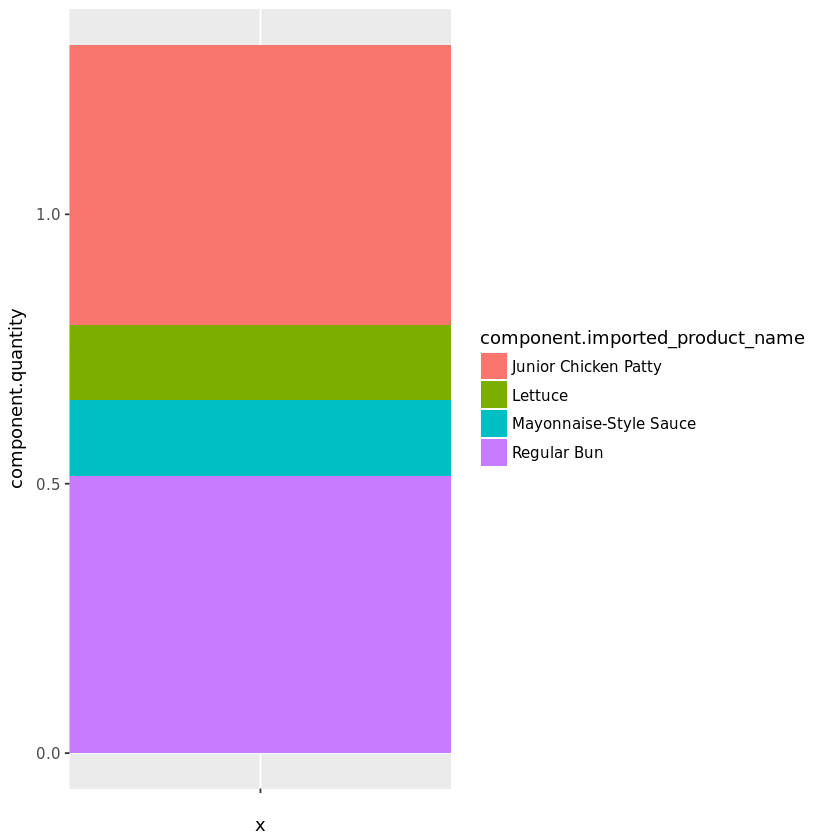

In [79]:
bp

In [80]:
head(componentNameQuantity)

component.imported_product_name,component.quantity
Junior Chicken Patty,0.5200
Regular Bun,0.5148
Mayonnaise-Style Sauce,0.1403
Lettuce,0.1400


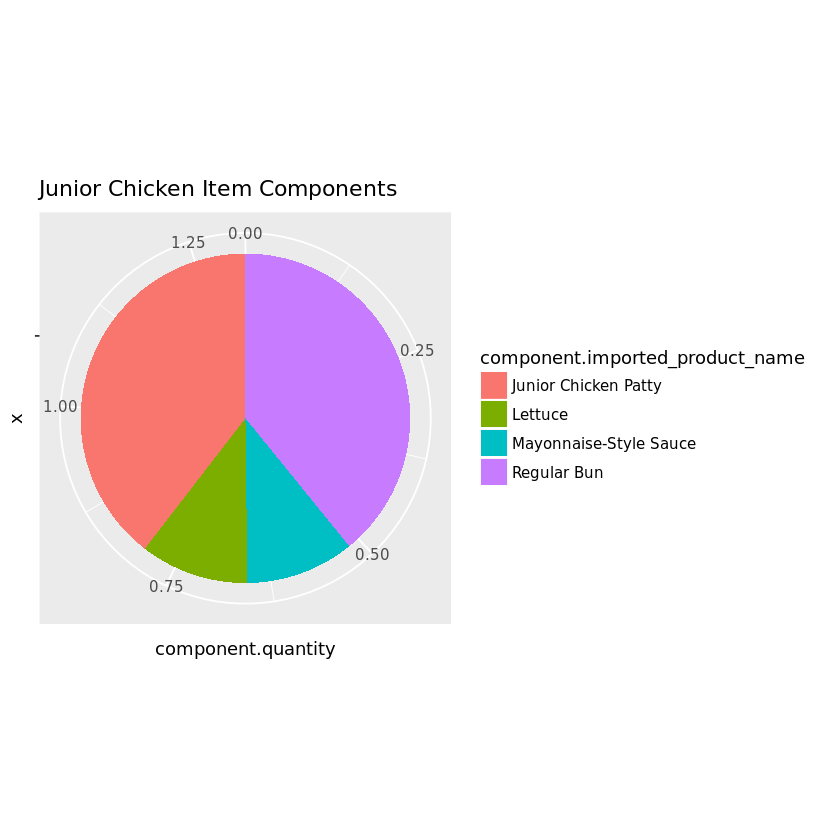

In [81]:
# Creating a pie chart
pie <- bp + coord_polar("y", start=0) + ggtitle(paste(itemName, "Item Components", sep=" "))
pie

In [98]:
itemAllergens <- component$product_allergen

In [99]:
itemAllergens

[[1]]
[1] "WHEAT."

[[2]]
[1] "WHEAT, BARLEY."

[[3]]
[1] "EGG, MUSTARD."

[[4]]
named list()

In [100]:
itemName2 <- component$imported_product_name

In [102]:
itemName2

[1] "Junior Chicken Patty"   "Regular Bun"            "Mayonnaise-Style Sauce"
[4] "Lettuce"

itemName2

In [103]:
itemName2

[1] "Junior Chicken Patty"   "Regular Bun"            "Mayonnaise-Style Sauce"
[4] "Lettuce"

In [111]:
class(itemName2)

[1] "character"

In [115]:
# Convert from character type to array
itemNameArray <- array(itemName2)

In [116]:
itemNameArray

[1] "Junior Chicken Patty"   "Regular Bun"            "Mayonnaise-Style Sauce"
[4] "Lettuce"

In [117]:
class(itemNameArray)

[1] "array"

In [118]:
length(itemNameArray)

[1] 4

In [119]:
# Convert from list type to array
itemAllergensArray <- array(itemAllergens)

In [120]:
itemAllergensArray

[[1]]
[1] "WHEAT."

[[2]]
[1] "WHEAT, BARLEY."

[[3]]
[1] "EGG, MUSTARD."

[[4]]
named list()

In [121]:
class(itemAllergensArray)

[1] "array"

In [122]:
componentNameQuantity <- data.frame(itemNameArray, itemAllergensArray)

In [123]:
componentNameQuantity

itemNameArray,itemAllergensArray
Junior Chicken Patty,WHEAT.
Regular Bun,"WHEAT, BARLEY."
Mayonnaise-Style Sauce,"EGG, MUSTARD."
Lettuce,NULL


In [130]:
# Add a column to the dataframe. True if ingredients contain allergen. 
containsWheat <- regexpr('WHEAT', itemAllergensArray)

In [131]:
containsWheat

[1]  1  1 -1 -1
attr(,"match.length")
[1]  5  5 -1 -1
attr(,"useBytes")
[1] TRUE

In [153]:
for(i in containsWheat){
  if (toString(containsWheat[i]) == "1")
      {print("true")
      print(componentNameQuantity$itemNameArray[i])}
    else
        {
        print("false")
    }
}

[1] "true"
[1] "Junior Chicken Patty"
[1] "true"
[1] "Junior Chicken Patty"
[1] "false"
[1] "false"
